## Preambule

In [1]:
import numpy as np
import xarray as xr
from importlib import reload
import pandas as pd
from tqdm import tqdm
import json
from pathlib import Path
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import Functions
reload(Functions)
from Functions import (pop_func, emis_func, determine_coefficient,
                       popshare_func, emisshare_func, emis_total_func, rho, cumpopshare_func,
                       cumfuturepop_func, emis_f_func, gdp_future, create_groups, gdp_future_reread, grouping, grouping_xarray)

## Run class or read xarray file

In [161]:
import ClassEffortSharing
reload(ClassEffortSharing)
from ClassEffortSharing import shareefforts

efshare = shareefforts()
efshare.define_paths()
efshare.read_countrygroups()
if efshare.reread == True:
    efshare.read_unpop()
    efshare.read_hdi()
    efshare.read_gdp()
    efshare.read_edgar()
    efshare.read_primap()
    efshare.read_ar6()
    efshare.read_rci()
    efshare.read_ndc_cr()
    efshare.read_ndc()
    efshare.read_baseline()
    efshare.concat_xrobject()
    efshare.save_xrs_databases()
else:
    efshare.load_xrs_databases()
efshare.general_calculations()
efshare.save_budgets()
self = efshare

# ==================================== #
# Initializing shareefforts class    #
# ==================================== #
- Defining paths
- Reading country groups
- Load XR databases
- General calculations for effort sharing
- Save budgets


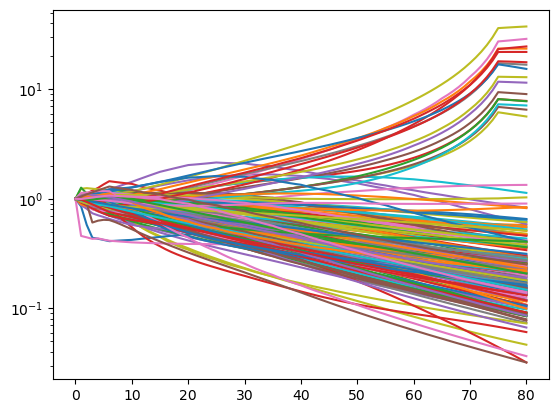

In [158]:
for c_i, c in enumerate(self.countries_iso):
    ar = (self.xr_total.Population**2 / self.xr_total.GDP).sel(ISO=c, Time=self.all_future_years)
    plt.semilogy((self.xr_total.Population**2 / self.xr_total.GDP).sel(ISO=c, Time=self.all_future_years)/(self.xr_total.Population**2 / self.xr_total.GDP).sel(ISO=c, Time=2020))

## Other analyses

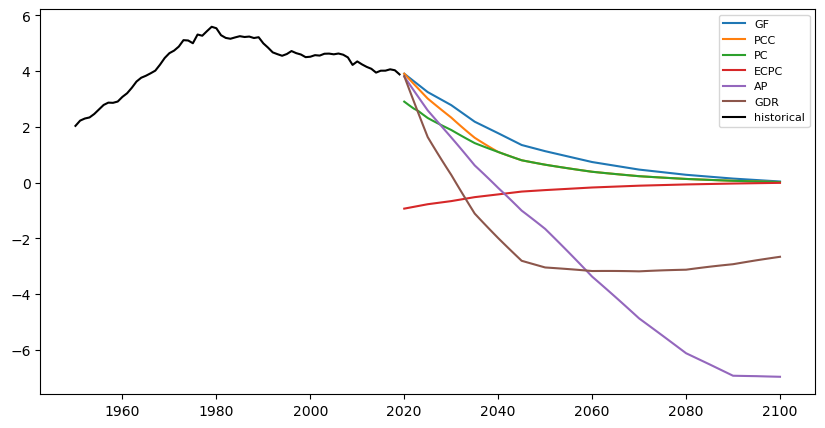

In [4]:
reg = "EU"
ccat = 'C1+C2'
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).GF, label='GF')
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).PCC, label='PCC')
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).PC, label='PC')
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).ECPC, label='ECPC')
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).AP, label='AP')
plt.plot(self.xr_budgets_scenario.Time, self.xr_budgets_scenario.sel(Category=ccat, ISO=reg).GDR, label='GDR')
plt.plot(self.xr_total.Time, self.xr_total.GHG_p.sel(ISO=reg), 'k', label='historical')
plt.legend(fontsize=8)

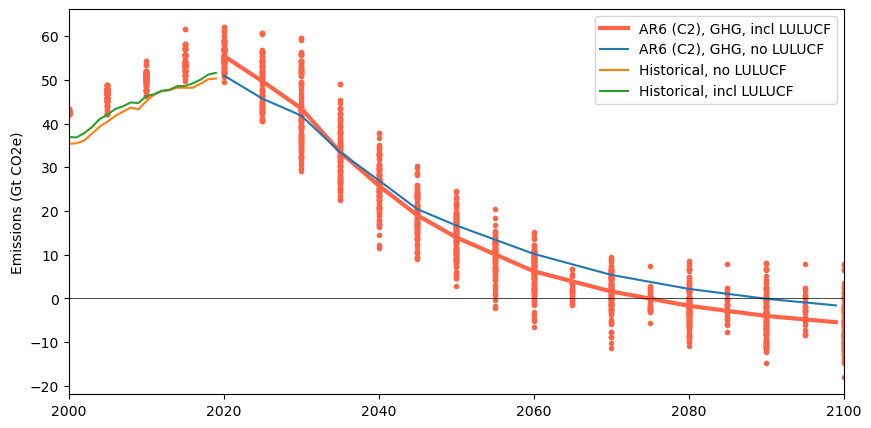

In [13]:
#plt.plot(np.arange(2020, 2100), self.xr_total.GHG_f_co2.sel(Category='C2', Time=np.arange(2020, 2100)), label='AR6, CO$_2$, incl LULUCF')

fig = plt.figure(figsize=(10, 5))
Y = np.array(DF_raw[DF_raw.Variable == "Emissions|Kyoto Gases"][DF_raw.keys()[5:-1]])
ms = np.array(DF_raw[DF_raw.Variable == "Emissions|Kyoto Gases"].ModelScenario)
for dat in range(len(Y)):
    y = Y[dat]/1000
    t = np.array(DF_raw.keys()[5:-1]).astype(int)
    #plt.plot(t, y, ',', c='k', lw=0.5)
    try:
        if modcat[:, np.where(modcat[0] == ms[dat])][1][0][0] == "C2":
            plt.plot(t, y, '.', c='tomato', lw=0.5)
    except:
        continue

plt.plot(np.arange(2020, 2100), self.xr_total.GHG_f_incl.sel(Category='C2', Time=np.arange(2020, 2100)), c='tomato', lw=3, label="AR6 (C2), GHG, incl LULUCF")
plt.plot(np.arange(2020, 2100), self.xr_total.GHG_f.sel(Category='C2', Time=np.arange(2020, 2100)), label="AR6 (C2), GHG, no LULUCF")
plt.ylabel("Emissions (Gt CO2e)")

# Historical
plt.plot(self.xr_total.Time, self.xr_total.GHG_p.sel(ISO='WORLD'), label="Historical, no LULUCF")
plt.plot(self.xr_total.Time, self.xr_total.GHG_p_incl.sel(ISO='WORLD'), label="Historical, incl LULUCF")
plt.xlim([2000, 2100])
plt.plot([-1e3, 2e5], [0, 0], 'k', lw=0.5)
plt.legend()

## Checks

In [ ]:
var = "A2_gdp_net"
reg = "WORLD"
cat = "C1+C2"
s = float(self.xr_budgets_static.sel(Region=reg, Ccat=cat, Variable=var).Value)
l = float(self.xr_budgets_linear.sel(Region=reg, Ccat=cat, Variable=var).sum(dim="Time").Value)
d = float(self.xr_budgets_scenario.sel(Region=reg, Ccat=cat, Variable=var).sum(dim="Time").Value)
print('static', s)
print('linear', l)
print('dynamic', d)

static 1207.6500617079716
linear 1207.6500617079714
dynamic 1209.7794699941937


In [ ]:
var = "A1_gdp_pos"
reg = "G20"
cat = "C1"
year = 2050
l = float(self.xr_budgets_linear.sel(Region=reg, Ccat=cat, Variable=var, Time=year).Value)
d = float(self.xr_budgets_scenario.sel(Region=reg, Ccat=cat, Variable=var, Time=year).Value)
print('linear', l)
print('dynamic', d)

linear 11.99143796288674
dynamic 9.63999609965339


In [ ]:
reg = "G20"
cat = "C4"
var = "A1_"
s = float(self.xr_budgets_static.sel(Region=reg, Ccat=cat, Variable="A1_gdp_pos").Value) / float(self.xr_budgets_static.sel(Region="WORLD", Ccat=cat, Variable="A1_gdp_pos").Value)
l = float(self.xr_budgets_linear.sel(Region=reg, Ccat=cat, Variable="A1_gdp_pos").sum(dim="Time").Value) / float(self.xr_budgets_linear.sel(Region="WORLD", Ccat=cat, Variable="A1_gdp_pos").sum(dim="Time").Value)
d = float(self.xr_budgets_scenario.sel(Region=reg, Ccat=cat, Variable="A1_gdp_pos").sum(dim="Time").Value) / float(self.xr_budgets_scenario.sel(Region="WORLD", Ccat=cat, Variable="A1_gdp_pos").sum(dim="Time").Value)
print('static', s)
print('linear', l)
print('dynamic', d)

static 0.4633499366265762
linear 0.46334993662657625
dynamic 0.4633499366265762


In [ ]:
self.xr_budgets_scenario.sel(Region="EU", Time=2030, Variable='GF')

<xarray.Dataset>
Dimensions:   (Ccat: 12)
Coordinates:
  * Ccat      (Ccat) object 'C1' 'C1+C2' 'C2' 'C3' ... 'C6' 'C7' 'C7+C8' 'C8'
    Region    <U2 'EU'
    Time      int64 2030
    Variable  <U2 'GF'
Data variables:
    Value     (Ccat) float64 2.188 2.761 3.205 3.182 ... 3.876 4.289 4.369 4.821

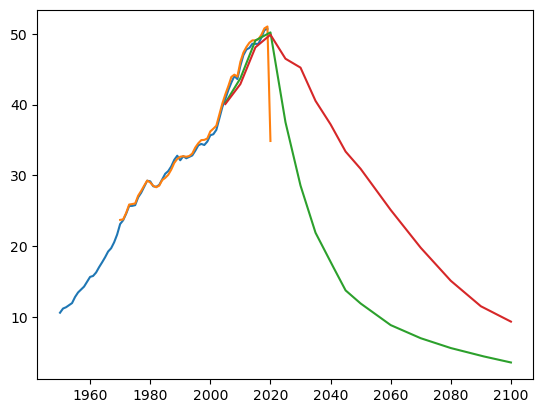

In [ ]:
plt.plot(self.xr_total.Time, self.xr_total.sel(ISO="WORLD").GHG_p)
plt.plot(self.xr_total.Time, self.xr_total.sel(ISO="WORLD").GHG_e)

plt.plot(self.xr_total.Time, self.xr_total.sel(ISO="WORLD", Category="C1").GHG_f)
plt.plot(self.xr_total.Time, self.xr_total.sel(ISO="WORLD", Category="C4").GHG_f)